In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
#train.keys()

In [4]:
#print(train.groupby("Sex")["Survived"].value_counts(normalize=True))

In [5]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [6]:
train=train.drop(["PassengerId","Name","Ticket","Embarked","Cabin"], axis=1)
test=test.drop(["PassengerId","Name","Ticket","Embarked","Cabin"], axis=1)

In [7]:
newAges=np.array(test['Age'])
midle=newAges[~np.isnan(newAges)].mean()
newAges[np.isnan(newAges)]=midle
test['Age']=newAges

newAges=np.array(train['Age'])
midle=newAges[~np.isnan(newAges)].mean()
newAges[np.isnan(newAges)]=midle
train['Age']=newAges

In [8]:
newFares=np.array(test['Fare'])
midle=newFares[~np.isnan(newFares)].mean()
newFares[np.isnan(newFares)]=midle
test['Fare']=newFares

newFares=np.array(train['Fare'])
midle=newFares[~np.isnan(newFares)].mean()
newFares[np.isnan(newFares)]=midle
train['Fare']=newFares

In [9]:
train=train.dropna(subset=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'])
test=test.dropna(subset=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'])

In [10]:
print(train.shape)
print(train.keys())
print(test.shape)
print(test.keys())

(891, 7)
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
(418, 6)
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [11]:
#male=0
#female=1
tmp=np.array(train["Sex"])
tmp[tmp=="male"]=0
tmp[tmp=="female"]=1
train["Sex"]=tmp

In [12]:
tmp1=np.array(test["Sex"])
tmp1[tmp1=="male"]=0
tmp1[tmp1=="female"]=1
test["Sex"]=tmp1

In [13]:
#print(train)

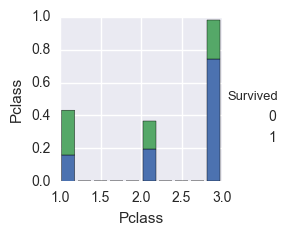

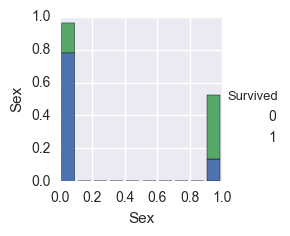

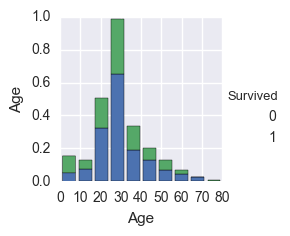

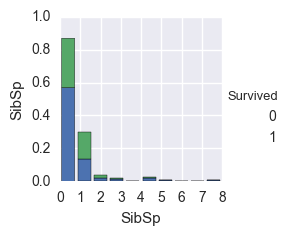

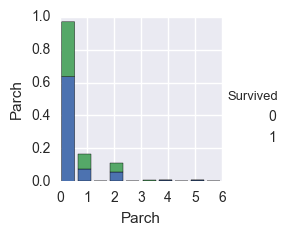

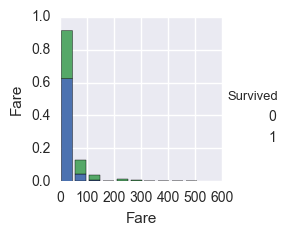

In [14]:
sns.pairplot(train,vars=["Pclass"],hue="Survived")
sns.pairplot(train,vars=["Sex"],hue="Survived")
sns.pairplot(train,vars=["Age"],hue="Survived")
sns.pairplot(train,vars=["SibSp"],hue="Survived")
sns.pairplot(train,vars=["Parch"],hue="Survived")
sns.pairplot(train,vars=["Fare"],hue="Survived")
sns.plt.show()

In [15]:
clf=LogisticRegression()
svm=clf = SVC(kernel='rbf')
randomForest = RandomForestClassifier(n_estimators=100, random_state=0)
kMeans = KMeans(2)

In [16]:
clf.fit(train.drop(["Survived"], axis=1),train["Survived"])
svm.fit(train.drop(["Survived"], axis=1),train["Survived"])
randomForest.fit(train.drop(["Survived"], axis=1),train["Survived"])
kMeans.fit(train.drop(["Survived"], axis=1),train["Survived"])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
answersLogisticRegression=clf.predict(test)
answersSVM=svm.predict(test)
answersRandomForest=randomForest.predict(test)
answerskMeans=kMeans.predict(test)

In [18]:
test=pd.read_csv("test.csv")
test=test.drop(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch','Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)

In [19]:
submission = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": answersLogisticRegression
})

submission.to_csv("LogisticRegression.csv", index=False)


submission = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": answersSVM
})

submission.to_csv("SVM.csv", index=False)

submission = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": answersRandomForest
})

submission.to_csv("RandomForest.csv", index=False)

submission = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": answerskMeans
})

submission.to_csv("KMeans.csv", index=False)